#  ASSIGNMENT 1: DESIGN OF FIR FILTER WITH PYTHON




# INTODUCTION AND SUMMARY:
 Design of a Bandpass FIR Filter to filter out two of three sinusoids and attenuate gausian noise lying outside of the specified cutoff frequencies determined in this report. 
 
 In signal processing, a finite impulse response (FIR) filter is a filter whose impulse response (or response to any finite length input) is of finite duration, because it settles to zero in finite time. This is in contrast to infinite impulse response (IIR) filters, which may have internal feedback and may continue to respond indefinitely (usually decaying).  https://en.wikipedia.org/wiki/Finite_impulse_response

 The window method used in this report is one of the techniques used in designing FIR filters. The window method for filter design is a very convenient and fast way of implementing/designing a filter. In the window method the frequency response of the ideal filter which is non causal and infinite in duration is convolved with the frequency reponse of a window of finite length/duration M (M here is the number of taps). This window function is symmetric (exhibits either positive or negative symmetry). A multiplication in the time domain is a convolution in the frequency domain
 
 Implementing an ideal filter is impractical beacause of its non causality and infinite impulse response, these characteristics make them impossible to realize using existing hardware technology or finite-time computable algorithms. Hence the reason for the convolution discussed in the paragraph above.
 The result of this convolution is a causal filter of M coefficents with an impulse response which is finite in duration.
  
 Python libraries and modules such as scipy, pandas and matplotlib are used in this report, with details of every methods used explained in a concise manner.

**Aims and objectives**

- Obtain frequency response of the input discrete time signal 
- Identification of frequency components 
- Determination of filter specifications (cutoff frequencies, stopband attenuation, window length, transition bandwidth)
- Design of filter (obtaining filter coefficients)
- Demonstration of impulse response and frequency response of the filter designed
- Comparison of output signal to input signal (discrete time and spectrum analysis)

#### STEP 1: Import the necessary libraries and modules needed
- pandas to read csv file into a DataFrame object and for data preprocessing
- numpy for mathematical functions and for working with arrays
- matplotlib, pyplot module is used from the matplotlib library and named as plt to plot signals
- scipy for algorithms that optimize scientific computing
- seaborn to make plots more aesthetically pleasing

In [1]:
import pandas as pd
from pandas import array
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
from mpltools import layout #to aaid with subplots 


#### STEP 2: EXPLORE THE DATA AND PREPROCESS THE DATA

(Times Series Measurement) sampled signal in data27.csv was read into a DataFrame. The values method returns a Series object which is array like. Scipy methods and functions takes array like arguments as parameters and not DataFrame objects.


In [2]:
discrete_time_signal = pd.read_csv("data27.csv", header=None)
discrete_time_signal = discrete_time_signal[0].values
discrete_time_signal.size

2048

2,048 data points represent the discrete time input signal... size method returns the length of the Series object

#### Step3: Plot the discrete time input signal 

- a plot of all 2048 samples on top and a plot of the first 200 samples of the discrete time signal 

Text(0.5, 0, 'n samples')

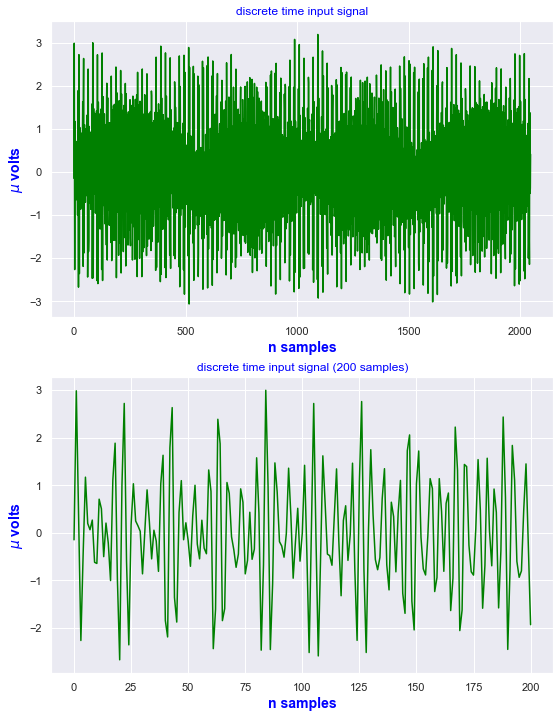

In [3]:
from turtle import color

sns.set_theme()   #the set_theme function in the seaborn library is used make plots a more aesthetic detailed look
sns.axes_style("darkgrid")
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)    #creation of the subplot object "figure" returning a tuple of axis ax1 and ax2
ax1.set_title("discrete time input signal", color="blue")  #sets the title of the top axis ax1 color argument is passed as "blue"
ax2.set_title("discrete time input signal (200 samples)", color="blue") #ets the title of the bottom axis ax2, color argument is passed as "blue"
fig.set_figheight(12)   #sets height dimension of subplot
fig.set_figwidth(9)  #sets wudth dimension of subplot 
ax1.plot(discrete_time_signal, color="green", ) #plot ax1 of the subplot fig
ax2.plot(discrete_time_signal[0:201], color="green") #plot the ax2 of the subplot fig, showing the first 500 data points a slice is used "[0:501]"
# plt.plot(discrete_time_signal[0:500], color="green") #

ax1.set_ylabel('$\mu$ volts', fontsize=14, color="blue", weight="bold")
ax1.set_xlabel('n samples', fontsize=14, color="blue", weight="bold")
ax2.set_ylabel('$\mu$ volts', fontsize=14, color="blue", weight="bold")
ax2.set_xlabel('n samples', fontsize=14, color="blue", weight="bold")
# lines 14 -17 in this code cell lables the x and y axis of each subplot axis (ax1 and ax2)

#### Step 4: Frequency Analysis of the discrete input signal...
- The periodogram function was used for spectrum analysis, periodogram function returns the power spectrum (power spectral density) of a time series of values (array_like). Scipy's periodogram function detects the dominant frequencies in a time series measurement, it is the square of the Fourier coefficients which can also be computed using scipy.fft.fftfreq() this is accordance with Parseval's Theorem which states that the power of a signal is equal to the sum of square of the magnitudes of various harmonic components present in the discrete spectrum.
https://en.wikipedia.org/wiki/Parseval%27s_theorem


In [4]:
Fs = 1 #sampling frequency in Hertz --- 1Hz
f, sinusoid_periodogram =  signal.periodogram(discrete_time_signal, Fs, 'boxcar', nfft=1024, detrend=False) #returns an array of normalized frequencies "f" and 
#power spectral densities "sinusoid periodogram"
#discrete_time_siganl which is a time series measuremnt was passed as an argument
#length of fourier transform nfft is half the length of data points which made the plot a bit smoother
# boxcar window used as window parameter4

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html

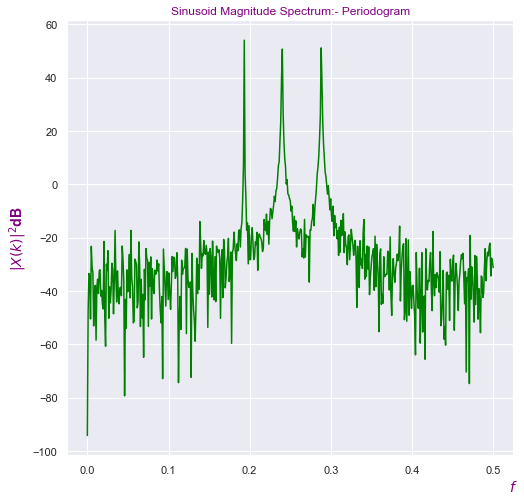

In [5]:

plt.figure(figsize=(8,8)) #set dimension of plot
plt.plot(f, 20*np.log10(sinusoid_periodogram), color="green") #the spectral densities expressed in decibels dB 20logsinusoid_periodogram
plt.title("Sinusoid Magnitude Spectrum:- Periodogram", color ="purple") #set title of plot
plt.ylabel('$|X(k)|^2$dB', fontsize=14, color="purple", weight="bold") #set label of y axis
plt.xlabel('$f$', fontsize=14, color="purple", weight="bold",  x=1.0)#set label of x axis
# plt.axis([0,250,-120,100])
plt.grid(True)
# plt.tight_layout() # ensure sufficient spacing between subplots


Periodogram showing Power Spectral density of the input discrete time signal in the figure above

#### Step 4b: Determination of present sinusoids in the discrete time signal
The function max_values is declared below, frequencies and spectral density (in decibels) obtained from periodogram were passed as arguments along with n=3(3 highest points) and spectral power density and frequencies of the 3 sinuosoids were returned as a dictionary

In [6]:
def max_values(freq, mag, n):

    """
        Takes two array like objects as arguments and an integer as a third argument
        returns a dictionary
    """
    mag = list(mag)
    max_values = []
    dict_a = {}
    dict_b = {}
    i = 0
    for elements in mag:
        dict_a[elements] = freq[i]
        i += 1
    for i in range(n):
        top = max(mag)
        max_values.append(max(mag))
        dict_b.update({top: dict_a[top]})
        mag.remove(max(mag))
    return dict_b

In [7]:
magnitudes = 20*np.log10(sinusoid_periodogram)
present_sinusoids = max_values(f, magnitudes, 3)
present_sinusoids

{54.03576637256631: 0.193359375,
 51.14990625031466: 0.2880859375,
 50.71461388495497: 0.240234375}

The sinusoids present in Data27 were computed to be:
- 0.193359375 Hz sinusoid
- 0.240234375 Hz sinusoid
- 0.2880859375 Hz sinusoid


The plot below in Cell 8 shows the sinuosoids present in the magnitude spectrum, the plt.stem() method was used to plot stem plots in red marking the frequencies of the sinusoids. 

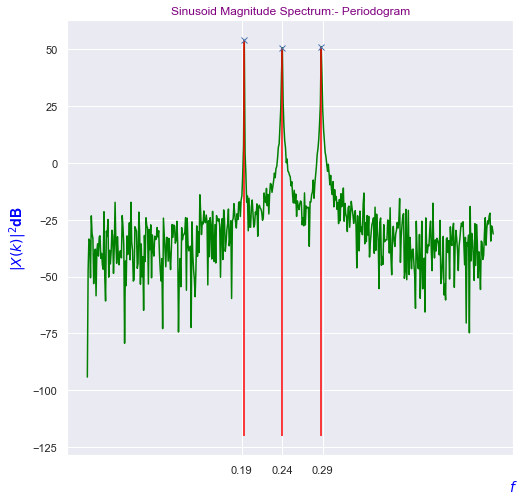

In [8]:
plt.figure(figsize=(8,8)) #dimension of the plot 
plt.plot(f, 20*np.log10(sinusoid_periodogram), color="green") #frequencies "f" and 20log(sinusoid_periodogram) in dB returned from the signal.periodogram function
plt.stem(present_sinusoids.values(), present_sinusoids.keys(), bottom=-120, basefmt=" ", markerfmt="x", linefmt="red") #used to draw lines perpendicular to the baseline
plt.xticks(ticks=[0.19, 0.24, 0.29]) #mark the frequencies on power spectrum 
plt.title("Sinusoid Magnitude Spectrum:- Periodogram", color ="purple") #labels the plot
plt.ylabel('$|X(k)|^2$dB', fontsize=14, color="blue", weight="bold") #labels the y axis
plt.xlabel('$f$', fontsize=14, color="blue", weight="bold",  x=1.0) #labels the x axis
plt.show() #shows thr plot

#see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html for more

#### Step 5 DESIGN OF THE FIR FILTER (BANDPASS FILTER THAT ATTENUATES the 0.2880859375 Hz sinusoid and 0.193359375 Hz sinusoid)

To design a Bandpass filter irrespective of the technique being used: window technique or frequency sampling techniques or optimal filter design methods, two approches could be used.

1 - Cascade of low pass and high pass filter

2 - Use of just a bandpass filter

One bandpass filter is used in this report. To Design a bandpass filter firwin function in the signals module of scipy library was used. With the firwin function the cuttoff frequencies of the band pass filter can be passed as a list.


#### step 5b. Determination of Filter specification


Using the window method, transition bandwidth needs to be specified

transition_bandwidth Δf1 = fp1 - fs1 / Fs ;  Δf2 = fp2 - fs2 / Fs (where Fs is sampling frequency = 1 in this report) /for the bandpass filter two transition bandwidths were calculated but the higher of the two was used in the firwin function 
fs1, and fs2 are the two stopbands 0.240234375Hz and 0.2880859375Hz respectively

cutt-off_frequencies fc1 = fp1 - Δf1/2;  fc2 = fp2 + Δf2/2

filter length "M" = 3.3/Δf ; hamming window    #The hamming window is used in this report because with enough window taps M the width of the main 
                                               #lobe of the window would be narrow enough similar to that of a rectangluar window of a smaller width #explanations are detailed below


*How to determine the right window to implement filter*

The choice of window goes a long way in determining the smoothness of the filter's spectrum and detectability of frequnecy peaks. https://ccrma.stanford.edu/~jos/parshl/Analysis_Window_Step_1.html 

The desired spectrum characteristics of filters is a narrow mainlobe and very low side level. Considering the impulse response of the window function, the impulse response also has main lobes and side lobes. The main lobe of the window's impulse response influences the passband ripples of the filter's spectrum response while the side lobes of the window's impulse response influences the transition band of the filter's spectrum response. As a result of this it is paramount to make the right choice of window as the choice of window because the mainlobes and sidelobes differ. Really it is all a trade-off(for example the rectangular window has the narrowest mainlobe but the side lobes are very high -13bB in comparison to the hamming window's -41dB).

The main lobe width of the window is a function of the length of the window. for all window functions to reduce main lobe width a wider window is needed (M is increased) but the downside of increasing the window width is the cost of computation.

It is important when using the window function to consider the following: transition bandwidth, Window length, stopband attenuation required, passband ripple in order to make the right choice of window (Rectangular, Hanning, Hamming, Blackman, Kaiser)


In [9]:
stopband_freq1, passband_freq, stopband_freq2 = (0.193359375, 0.240234375, 0.2880859375) #unpacks tuple, assigning values to stop band frequencies and passband frequency
Fs = 1 #sampling frequency, all divisions would be normalized by 1

fp2 = passband_freq + ((stopband_freq2 - passband_freq)/2) #determining the passband frequency on both sides of the bandpass filter 
fp1 = stopband_freq1 + ((passband_freq - stopband_freq1)/2) 
passband_bandwidth = fp2 - fp1
transition_bandwidth = (stopband_freq2 - fp2), (fp1 - stopband_freq1)
transition_bandwidth = np.array(list(transition_bandwidth))
fp1, fp2, passband_bandwidth, transition_bandwidth

(0.216796875, 0.26416015625, 0.04736328125, array([0.02392578, 0.0234375 ]))

Two transition bandwidths were calculated, bandpass filters have two transition bandwidths and two cut-off frequencies [0.02392578, 0.0234375 ]

#### Step 5bi Normalized cutoff frequencies calculation

Passband frequencies of the bandpass filter, passband bandwidth and transition bandwidth of the filter were calculated in cell 9 and returned as a tuple in the output cell. The passband frequencies calculated above are used to compute normalized cut_off_frequencies in the code cell below 

In [10]:
normalized_cut_off_frequencies = [(stopband_freq1 + ((fp1 - stopband_freq1)/2)), (fp2 + ((stopband_freq2 - fp2)/2))]
normalized_cut_off_frequencies = np.array(normalized_cut_off_frequencies)
normalized_cut_off_frequencies

array([0.20507812, 0.27612305])

#### Step 5bii Window length "M" Calculation

In [11]:
M = 3.3 / transition_bandwidth  #formula for window length of hamming window
M, np.ceil(M) 

(array([137.92653061, 140.8       ]), array([138., 141.]))

the higher of the two was rounded up to an odd value M = 141 using numpy's ceil function. This is fewer computations than the blackman window  where M = 235 for this same transitionband (5.5/transition bandwidth) points... both passband ripple of these two windows are very close in value and an attenuation 53dB in comparison to 75dB is very much desirable as a blackman window would require almost as twice as many computations (235 vs 141).
Hamming gives more stopband attenuation than Rectangular and Hanning window methods, and less passband ripple. Making it more ideal and thus the reason it was used for this design

In [12]:
M = 141
MidM = (M - 1)//2
MidM

70

Window midpoint = 70

##### Step 6: Design of filter using scipy's firwin function in the the signal module. 
In this report the window which was determined to be hamming was passed as a keyword argument, the window length was also passed as an argunment, along with the calculated normalized cut off frequencies computed in cell 9. The firwin function returned filter coefficient that completely describes the filter that meets the following conditions:

stop band attenuation           75dB

transition bandwidth            0.02392578Hz  and 0.0234375Hz

cut off frequencies             0.20507812Hz and 0.27612305Hz

window length "M"[odd]          141 

In [13]:

bandpass_impulse_response_coeff = signal.firwin(M, normalized_cut_off_frequencies, window = 'hamming', fs = 1, pass_zero=False) 

#coefficients of the designed finite impulse response bandpass filter were computed by signal.firwin function and assigned to the variable bandpass_impulse_response_coeff


#### Step 7a: Impulse Response of Filter:

The impulse response of the designed filter is shown below. The impulse response of a filter describes the filter in the time domain. The plot below show all M points (141 in total determined in Cell 11)

([<matplotlib.axis.XTick at 0x284e7baf910>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

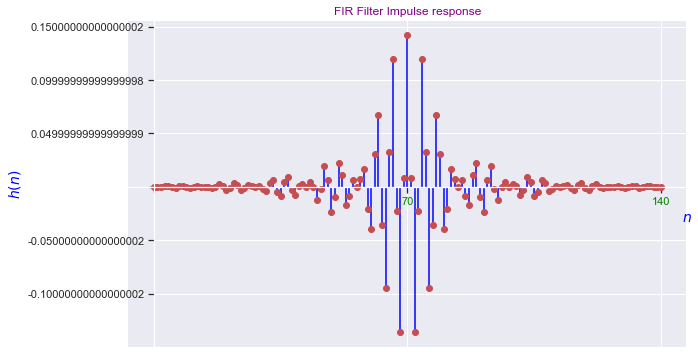

In [14]:
plt.figure(figsize = (10,6)) # 10 in by 6 dimension
plt.stem(bandpass_impulse_response_coeff, linefmt='blue', markerfmt='ro', use_line_collection = True, basefmt=" ") #stem plot indicating all 
plt.title("FIR Filter Impulse response", color ="purple")
plt.ylabel('$h(n)$', fontsize=14, color="blue", weight="bold") 
plt.xlabel('$n$', fontsize=14, color="blue",  x=1.0)
layout.cross_spines(zero_cross=True) 
plt.xticks([0,MidM,M-1], color="green") #the causal impulse response from M = 0 to M = 140

#### Step 7b: Magnitude Response of the Bandpass FIR Filter

In [15]:
w, HWBP = signal.freqz(bandpass_impulse_response_coeff, fs = Fs) # HWBP is the frquency response H(F) and w are the different frequencies in Hertz


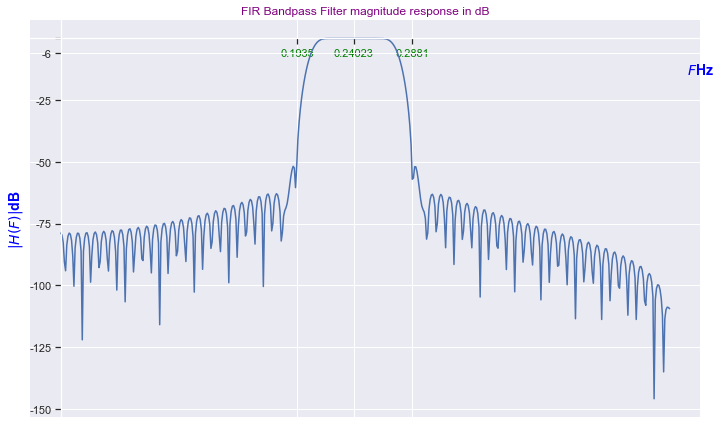

In [16]:
plt.figure(figsize=(10, 6)) #dimension of plots
plt.plot(w,20*np.log10(np.abs(HWBP))) #plots the frequency response 
plt.title("FIR Bandpass Filter magnitude response in dB", color ="purple") #title of the plot
plt.ylabel('$|H(F)|$dB', fontsize=14, color="blue", weight="bold") #label of the y axis
plt.xlabel('$F$Hz', fontsize=14, color="blue", weight="bold",  x=1.0) #label of the x axis
layout.cross_spines(zero_cross=True) 
plt.yticks([-150,-125,-100,-75,-50,-25,-6,0]) #tick showing the attenuations 
plt.xticks([0.1935, 0.24023, 0.2881], color="green") #frequencies ticked on the x axis
plt.tight_layout() 

side lobe attenuation can be interpolated as 53dB

#### Step 8: Filtered output signal

Time multiplication of impulse response of filter coefficients and input signal yield the filtered signal output. scipy's lfilter function in the signal  module was used to generate the filtered output signal. 

In [17]:
filtered_signal = signal.lfilter(bandpass_impulse_response_coeff, [1.0], discrete_time_signal) #bandpass_filter_coeff is passed as the numerator parameter, [1.0] is passed as the denominator coefficient
                                                                                        #dicrete_time_signal is the input array
                                                                                        #see the link for more https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

#### Step 8a: Time Plot of Filtered Signal

The filtered signal (plotted in blue) was plotted in contrast to the input signal (plotted in red) on the same plot.

The filtered signal was shifted by "MidM" to compensate for the phase delay. The designed filter is a linear phase filter and as such as a group delay of (M-1)/2 calculated as MidM in Cell 
In a Linear Phase system the different frequency sinusoids going through the system (In this case the Bandpass FIlter) experience the same delay which gets rid of distortions that is- no phase distortions

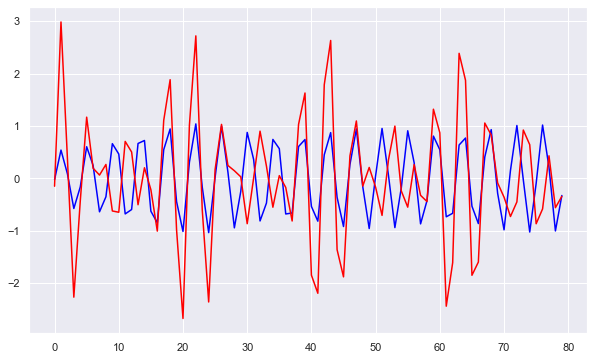

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal[MidM:80+MidM], color="blue")
plt.plot(discrete_time_signal[0:80], color="red")

Plotted to show 80 samples


#### Step 8ai: Input signal vs filtered signal on different plots

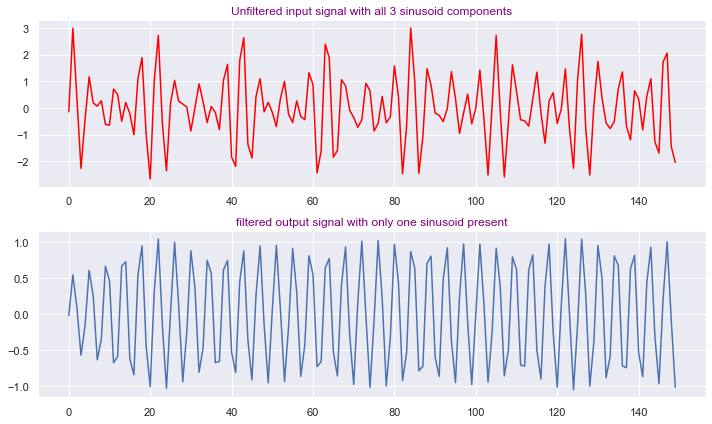

In [19]:
plt.figure(figsize = (10,6)) # 10 in by 6 in
plt.subplot(211)
plt.plot(discrete_time_signal[0:150], color="red")
plt.title("Unfiltered input signal with all 3 sinusoid components", color="purple")
plt.tight_layout() 
plt.subplot(212)
plt.plot(filtered_signal[MidM: MidM + 150])
plt.title("filtered output signal with only one sinusoid present", color ="purple")
plt.tight_layout() # ensure sufficient spacing between subplots

The filtered output signal has less sinusoidal components-one in contrast to 3 of the input signal. Both signals exhibit some sort of periodicity, but the filtered ouput signal is more similar to a typical sinusoid because it has just one frequency component as it result it appears smoother (less jagged) than the unfiltered signal. 
The amplitude of filtered output signal is less than that of the unfiltered input signal...More sinusoid components contribute to amplitude of the input unfiltered signal.

* Effect of Gaussian white noise*

The effect of the Gaussian white noise is clearly seen in the plot of Cell 19. Both signals (filtered output signal and input unfiltered signal) appear to be a bit jagged and not as smooth in contrast to a true sinusoid this is as a result of white gaussain noise present. Gaussian white noise (GWN) is a stationary and ergodic random process with zero mean that is defined by the following fundamental property: any two values of GWN are statistically independent now matter how close they are in time https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780471679370.app2#:~:text=Gaussian%20white%20noise%20(GWN)%20is,close%20they%20are%20in%20time. The power spectrum of Guassian noise is constant over all frequencies, this is illustrated in the cell output below, scipy's fft pack was used to illustrate this. Gaussian white noise is additive meaning the unfiltered input signal is made of an addition of 3 pure sinusoids of frequencies already determined. THE REASON WHY THE FILTERED SIGNAL STILL APPEARS JAGGERED IS BECAUSE GAUSSIAN WHITE NOISE HAS CONSTANT SPECTRUM AT ALL FREQUENCIES.

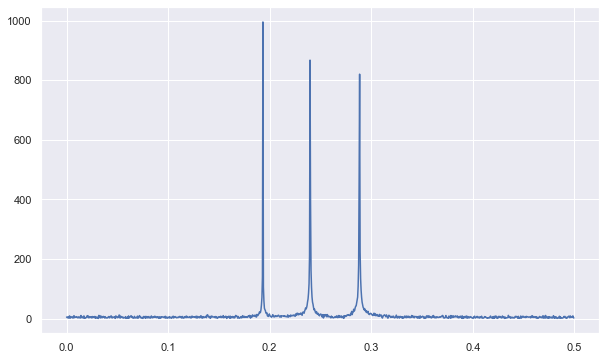

In [20]:
from scipy.fft import fftfreq, fft
y = fft(discrete_time_signal)[:len(discrete_time_signal)//2]
f = fftfreq(len(discrete_time_signal))[:len(discrete_time_signal)//2]
y = abs(y)
plt.figure(figsize=(10, 6))
plt.plot(f, y)

#### Step 8: Magnitude Plot 

Power Density Spectrum was plotted for the filtered output signal similar to that in cell 5, filtered spectrum has only one maxima above 0 compared to the input spectrum that had 3 above 0

Text(0.5, 1.0, 'Power Density Spectrum of Filtered output signal')

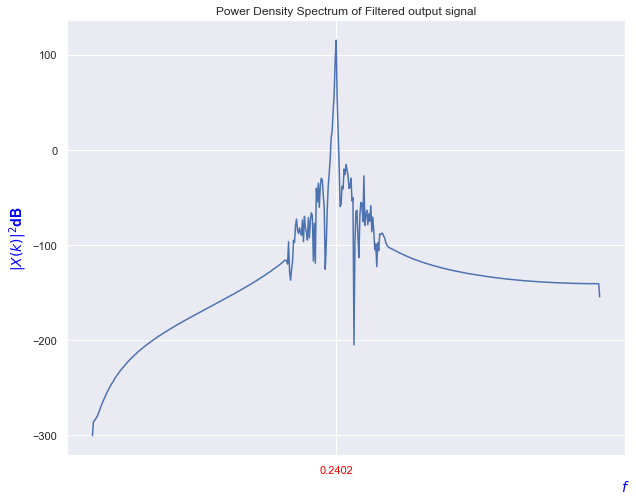

In [21]:
Fs = 1
f, sinusoid_periodogram =  signal.periodogram(filtered_signal, Fs, 'boxcar', nfft=1024, detrend=False) #returns frequencies and spectrum
plt.figure(figsize=(10, 8))
plt.plot(f, 20*np.log(sinusoid_periodogram)) #plot magnitudes against frequencies
plt.ylabel('$|X(k)|^2$dB', fontsize=14, color="blue", weight="bold") #label the y_axis
plt.xlabel('$f$', fontsize=14, color="blue", weight="bold",  x=1.0) #labels the y axis
plt.xticks(ticks=[0.240234375], color="red")  #marks the only sinusoid present in the filtered signal 
plt.title("Power Density Spectrum of Filtered output signal") #titlr of the plot


#### 8b - Welch function  magnitude response


Text(0, 0.5, 'Magnitude  $|X(k)|^2$dB ')

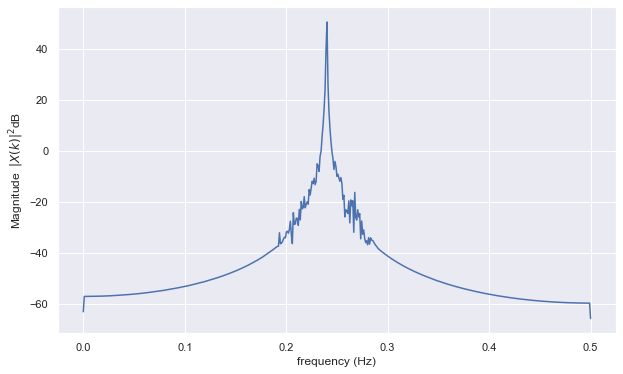

In [22]:

f, mag_response_welch =  signal.welch(filtered_signal, Fs, 'boxcar', nperseg=1024, detrend=False) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html
plt.figure(figsize=(10, 6))
plt.plot(f, 20*np.log10(mag_response_welch)) #convert to decibels by logarithmic operation to clearly read small quantity values
plt.xlabel("frequency (Hz)")
plt.ylabel("Magnitude  $|X(k)|^2$dB ")

# CONCLUSION:




#### A. Comparison of the power of the Three sinusoids before and after filtering

In [23]:
def frequency_power(freq, mag):
    i = 0
    dict_a = {}
    for elements in freq:
        dict_a[elements] = mag[i]
        i += 1
    return dict_a

This function is used in this report to create a key value pair of frequencies and magnitude of the filtered signal. The function returns a dictionary

In [24]:
freq_mag_dict = frequency_power(f, 20*np.log(sinusoid_periodogram))

In [25]:
freq_mag_dict[0.193359375] # magnitude of the 0.193359375Hz sinusoid after filtering (before filtering 54.03576637256631)

-96.67677771024759

In [26]:
freq_mag_dict[0.2880859375] #magnitude of the 0.2880859375Hz sinusoid after filtering (before filtering  51.14990625031466)

-92.66302150369017

In [27]:
freq_mag_dict[0.240234375] #magnitude of the 0.240234375Hz after filtering (before filtering 50.71461388495497)

115.14616378352352

#### B.  Filter details and specifications:

    - Window used                     Hamming window
    - Window length                   141
    - Passband frequencies            0.216796875Hz and 0.26416015625Hz
    - Stopband Attenuation            53dB
    - Transition bandwidths           0.02392578Hz and 0.0234375Hz
    - Cut off frequencies             0.20507812Hz and 0.27612305Hz
    - stop band frequencies           0.193359375Hz and 0.2880859375Hz
    


#### C. Discussion
The three sinusoids present in data27.csv were determined to be 0.193359375Hz, 0.240234375Hz and 0.2880859375Hz using signal.periodogram function and max_values function declared in cell 6. 

Hamming window was chosen over Hanning window because a Hanning window would require almost as twice as many computations of a Hamming window for a transition bandwidth of 0.27612305Hz (the higher of the two transition bandwidths on either side of the response spectrum was selected). Hamming was also over a rectangular window because one the number of taps are large enough the width of the Hamming starts to get as narrow as that of a rectangular window while providing better stopband attenuation, this is as the result of the smaller smoother side lobes. 

This report also provides plots of the spectrum of the filtered signal and the time domain plot of the signal from Cell 18 to Cell 21. The spectrum response and impulse response of FIR filter are shown in cell 16 and 14 respectively

The effect of gaussaian white noise on the signal pre filtering and post filtering was also discussed in detail. 